In [15]:
from pytesseract import pytesseract 

In [16]:
import os
import sys
import pandas as pd
from mkdir_p import mkdir_p
import time
import psutil
from PIL import Image
import pyautogui
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
pyautogui.screenshot(500,600)

TypeError: object of type 'int' has no len()

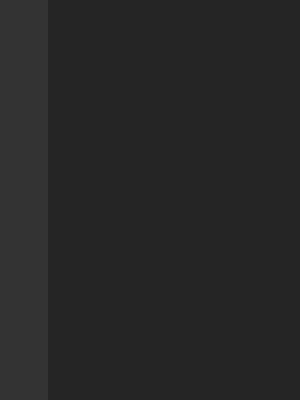

In [ ]:
pyautogui.screenshot(region=(0,500, 300, 400))

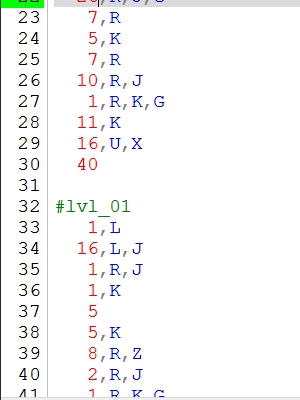

In [ ]:
time.sleep(2)
pyautogui.screenshot(region=(0,500, 300, 400))

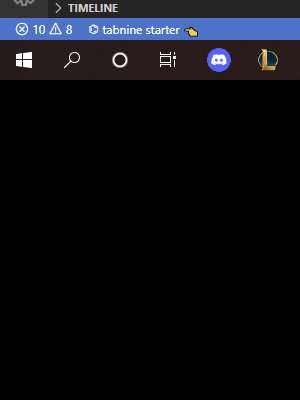

In [ ]:
time.sleep(2)
pyautogui.screenshot(region=(0,1000, 300, 400))

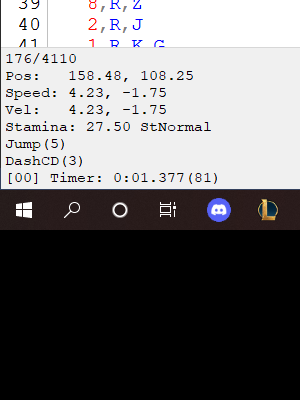

In [ ]:
time.sleep(2)
pyautogui.screenshot(region=(0,850, 300, 400))

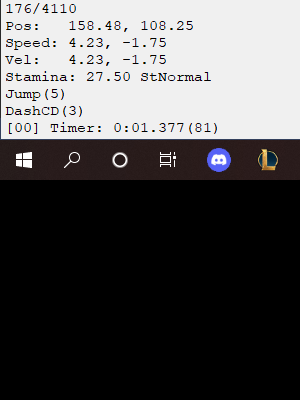

In [ ]:
time.sleep(2)
pyautogui.screenshot(region=(0,900, 300, 400))

In [ ]:
time.sleep(2)
im = pyautogui.screenshot(region=(0,900, 350, 150))

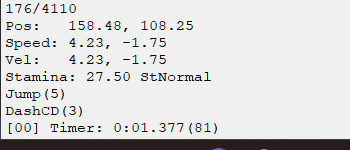

In [ ]:
im


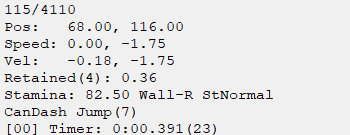

In [17]:
time.sleep(2)
im = pyautogui.screenshot(region=(0,900, 350, 135))
im

In [18]:
pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [19]:
text = pytesseract.image_to_string(im)
text

'115/4110\nPos: 68.00, 116.00\nSpeed: 0.00, -1.75\n-0.18, -1.75\nRetained(4): 0.36\n\nStamina: 82.50 Wall-R stNormal\nCanDash Jump (7\n[O00] Timer:\n\n0:00.391(23)\n'

In [54]:
import re
def capture_info(im):
    text = pytesseract.image_to_string(im)
    split1 = text.split('\n')
    print(split1)

    aux = 0
    frame,stateNum = 0, 0
    posX, posY, spdX, spdY = 0.0, 0.0, 0.0, 0.0
    statuses = [0] * 8
    for slice in split1:
        slice = slice.strip()
        if not slice:
            continue
        if "/" in slice:
            frame = slice.split('/', 1)[0]
            continue
        if "," in slice:
            d = re.findall("-?\d+\.\d+", slice)
            if len(d) == 2:
                if(aux == 0):
                    posX, posY = float(d[0]), float(d[1])
                    aux = 1
                elif(aux == 1):
                    spdX, spdY = float(d[0]), float(d[1])
                    aux = -1
                elif(aux == -1):
                    continue
            else:
                continue
            
        if(bool(re.findall("Wall-?R", slice, re.IGNORECASE))):
            statuses[0] = 1
        if(bool(re.findall("Wall-?L", slice, re.IGNORECASE))):
            statuses[1] = 1
        if(bool(re.findall("CanDash", slice, re.IGNORECASE))):
            statuses[2] = 1
        if(bool(re.findall("Ground", slice, re.IGNORECASE))):
            statuses[3] = 1
        if(bool(re.findall("Dead", slice, re.IGNORECASE))):
            statuses[4] = 1
        if(bool(re.findall("Coyote", slice, re.IGNORECASE))):
            statuses[5] = 1
        if(bool(re.findall("NoControl", slice, re.IGNORECASE))):
            statuses[6] = 1
        if(bool(re.findall("Frozen", slice, re.IGNORECASE))):
            statuses[7] = 1
        if(bool(re.findall("StIntroRespawn", slice, re.IGNORECASE))):
            stateNum = 0
        elif(bool(re.findall("StDash", slice, re.IGNORECASE))):
            stateNum = 1
        elif(bool(re.findall("StClimb", slice, re.IGNORECASE))):
            stateNum = 2
        elif(bool(re.findall("StNormal", slice, re.IGNORECASE))):
            stateNum = 3
        
    return frame, posX, posY, spdX, spdY, stateNum, statuses

In [56]:
frame, posX, posY, spdX, spdY, stateNum, statuses = capture_info(im)
print(frame)
print(posX)
print(posY)
print(spdX)
print(spdY)
print(stateNum)
print(statuses)



['115/4110', 'Pos: 68.00, 116.00', 'Speed: 0.00, -1.75', '-0.18, -1.75', 'Retained(4): 0.36', '', 'Stamina: 82.50 Wall-R stNormal', 'CanDash Jump (7', '[O00] Timer:', '', '0:00.391(23)', '']
115
68.0
116.0
0.0
-1.75
3
[1, 0, 1, 0, 0, 0, 0, 0]


In [53]:
slice = "Stamina: 82.50 Wall-R stNormal"
x = bool(re.findall("StNormal", slice, re.I))
print(x)

True
